In [3]:
import pandas as pd
import numpy as np
from spacy.util import minibatch, compounding
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
import sys
import pandas as pd
import re
import tensorflow as tf
print('Python Version: ' + sys.version)
print('TensorFlow Version: ' + tf.__version__)
import ktrain
from ktrain import text
ts = text.TransformerSummarizer()

print('Ktrain Version: ' + ktrain.__version__)

C:\Users\gargk\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gargk\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\gargk\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\gargk\AppData\Roaming\Python\Python38\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\gargk\AppData\Roaming\Python\Python38\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\gargk\AppData\Roaming\Python\Python38\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment vari

## Read ner tokenized data

In [4]:
df = pd.read_csv("ner_text_tokenized.csv")

In [6]:
df.shape

(4054576, 7)

### Preprocessing

Dropping nan, empty NER and dropping duplicate text.

In [7]:
df = df[~((df['NER'].isna()) | (df['NER'].astype(str)=='[]'))].drop_duplicates()

In [8]:
df.shape

(2153447, 7)

In [9]:
df.head()

,date,text_clean,topic,sentiment,proba_neg,proba_pos,NER
0,2022-01-06,CHICAGO AP Chicago school leaders canceled cl...,1,Negative,0.896170,0.103830,"[('CHICAGO', 'GPE'), ('AP', 'ORG'), ('Chicago'..."
1,2022-01-06,The Chicago Teachers Union sought to revert to...,1,Positive,0.467517,0.532483,"[('The Chicago Teachers Union', 'ORG')]"
2,2022-01-06,But Chicago Public Schools leaders have said r...,1,Negative,0.785331,0.214669,"[('Chicago Public Schools', 'ORG')]"
3,2022-01-06,The move to cancel classes and activities Thur...,1,Negative,0.964395,0.035605,"[('Thursday', 'DATE'), ('roughly 350,000', 'CA..."
5,2022-01-06,We have no choice but to cancel classes tomorr...,1,Negative,0.865027,0.134973,"[('tomorrow', 'DATE'), ('Pedro Martinez', 'PER..."


Converting to lowercase

In [11]:
df['text_clean'] = df['text_clean'].str.lower()

# Text Summarization (ktrain)

## On Positive keywords


### Superbowl

Filter on keyword, sentiment and topic

In [106]:
df1 = df[(df['text_clean'].str.contains('superbowl') & (df['sentiment'] == 'Positive')&(df['topic'] == 2))]

News from a particular day (Latest and has substantial text)

In [108]:
df1 = df1.loc[df1['date'] == '2022-05-01',:]

In [109]:
df11 = df1['text_clean'].drop_duplicates().reset_index()
text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')
text_clean

'bearsranking the super bowls nfl history super bowl chicago bears super bowlchicago bears on instagram ma turkey chivsdet chicago bears chicago bears football bears footballtwitter chicago bears football bears football superbowl championspin on chicago sportsnbc sports chicago. yet one of the best teams ever dabears superbowl chicago football chicago bears football bear pridepin by harold harlow on da bears nfc north chicago bears nfcpin'

In [110]:
text_summary = ts.summarize(text_clean)

In [112]:
text_summary

'The Chicago Bears won the Super Bowl on Sunday. The Bears are considered to be one of the best teams in the history of the NFL. The team has won more games than any other team in NFL history. It is the first time that the Bears have won a Super Bowl since the New England Patriots did so in 1986.'

### The new beginning alcohol and drug rehab center


In [55]:
df1 = df[(df['text_clean'].str.contains('alcohol and drug rehab center'))]

df1 = df1.loc[df1['date'] == '2022-05-04',:]

In [56]:
df11 = df1[(df1['sentiment'] == 'Positive') & 
   (df1['topic'] == 5)]['text_clean'].drop_duplicates().reset_index()


text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')

In [57]:
text_clean

'in chicagonot known details about new beginnings alcohol  drug rehabthe best strategy to use for alcohol and drug rehab center. alcohol has an exceptional ability to enable drinkers to forget or quit caring regarding their problems, which is why its so tempting to intensify when somebody is really feeling stressed out.9 easy facts about alcohol and drug rehab center in chicago shownnevertheless, the most typical efforts to alter alcohol consumption patterns entail things like changing brands or trying to scale back from liquor to beer or red wine.. some ideas on new beginnings alcohol and drug rehab center in chicago. to know before you buytable of contents examine this report about new beginnings alcohol and drug rehab center in chicagocontentsection0. examine this report about new beginnings alcohol and drug rehab center in chicagothe 10minute rule for number one rated alcohol rehab. the best strategy to use for new beginnings alcohol and drug rehab centeras well as while out of anx

In [58]:
ts.summarize(text_clean)

'The best strategy to use for alcohol and drug rehab center. Alcohol has an exceptional ability to enable drinkers to forget or quit caring regarding their problems. Alcohol addiction burglarizes people of the most important partnerships in their lives. The finest therapy programs provide lots of solutions over a duration of time.'

### New Years day

In [96]:
df1 = df[(df['text_clean'].str.contains('new years day') & (df['sentiment'] == 'Positive')&(df['topic'] == 3))]

df1 = df1.loc[df1['date'] == '2022-01-01',:]

In [99]:
df11 = df1['text_clean'].drop_duplicates().reset_index()
text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')
text_clean

In [102]:
text_summary = ts.summarize(text_clean)

In [105]:
text_summary.split('.')

['oh baby chicago area families welcome new babies on new years day january 1, 2022',
 ' The idot truck was parked in an accident investigation site southbound near 87th street when a passing car slammed into it',
 'cta and metra are offering you free and safe transportation to start the new year',
 '']

### Transportation

In [15]:
df1 = df[(df['text_clean'].str.contains('transportation')) & 
   (df['sentiment'] == 'Positive') & 
   (df['topic'] == 6)]['text_clean'].drop_duplicates().reset_index()


text_clean = df1.loc[:, 'text_clean'].str.cat(sep='. ')

In [18]:
text_clean

'FOR TRIPS:Trip Prize Conditions: All prize packages shall include roundtrip, coach class air transportation for winner from a major commercial airport near winners home to the destination and a double occupancy standard hotel room as specified in herein.. We are confident that Scotts previous experience as a clerk for a judge in the Illinois Appellate Court has prepared him to defend his clients in the transportation industry in personal injury and property loss matters.. Grand Prize trip includes roundtrip nonrefundable coach class air transportation from a majorairport near Winners residence to Chicago, IL for Winner and one 1 Guest three 3 daystwo2 nights standard double occupancy hotel accommodations ground transportation in Chicago,IL tofrom the airport and hotel and a culinary tour of Chicago, IL tour details determined inSponsors sole discretion.'

In [17]:
ts.summarize(text_clean)

'Grand Prize trip includes roundtrip, coach class air transportation for winner from a major commercial airport near winners home to the destination and a double occupancy standard hotel room as specified in herein. We are confident Scotts previous experience as a clerk for a judge in the Illinois Appellate Court has prepared him to defend his clients in the transportation industry in personal injury and property loss matters.'

### Missouri valley conference


In [154]:
df1 = df[(df['text_clean'].str.contains('missouri valley conference') & (df['sentiment'] == 'Positive')&(df['topic'] == 2))]

df1 = df1.loc[df1['date'] == '2022-03-04',:]

In [159]:
df11 = df1['text_clean'].drop_duplicates().reset_index()
text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')
text_clean

'the reigning missouri valley conference tournament champion loyola chicago ramblers take on the bradley braves in an mvc tournament quarterfinal matchup on friday afternoon in st. louis, missouri.. louis ap  aj green had 17 points as northern iowa beat illinois state 7865 in the missouri valley conference tournament quarterfinals on friday.. sportslines model revealed its college basketball picks for illinois state vs. northern iowa in the 2022 missouri valley conference tournament, also known as arch madness sourcenorthern iowa vs. illinois state prediction, odds: 2022 mvc tournament picks, best bets from proven modelsportslines model revealed its college basketball picks for illinois state vs. northern iowa in the 2022 missouri valley conference tournament, also known as arch madness. they might not be all that great defensively and they havent seen a turnover it didnt like to give up, but it hits the glass hard enough to lead the missouri valley conference in boards.. you can also 

In [160]:
text_summary = ts.summarize(text_clean)

In [161]:
text_summary

'The bradley braves take on the loyola chicago ramblers in a 2022 missouri valley conference tournament mens basketball game at enterprise center in st. louis. sportslines model revealed its college basketball picks for illinois state vs. northern iowa in the 2022 miss Missouri Valley Conference tournament, also known as arch madness. The southern illinois redbirds and drake bulldogs meet in the quarterfinals on Saturday night.'

### Immigration reform

In [37]:
df1 = df[(df['text_clean'].str.contains('immigration reform') & (df['sentiment'] == 'Positive'))]

df1 = df1.loc[df1['date'] == '2022-04-14',:]

In [40]:
df11 = df1['text_clean'].drop_duplicates().reset_index()
text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')
text_clean

'the crowd gathered on 26th street between troy street and albany avenue, to welcome omar gomez and homero ocon, immigration activists with united for immigration reform colorado, who arrived in chicago on the 24th day of a 40day bicycle ride from colorado to washington, d.c.the trek is expected to last through may 1, according to the suntimes.. the crowd gathered on 26th street between troy street and albany avenue, to welcome omar gomez and homero ocon, immigration activists with united for immigration reform colorado, who arrived in chicago on the 24th day of a 40day bicycle ride from colorado to washington, d.c.the trek is expected to last through may 1, according to the suntimes .theyre biking for immigration reform, and calling for an end to deportations.. delia was here helping get people to fill out their census forms, and the things shes been fighting to achieve for years  affordable housing, affordable health care, immigration reform  are the things that are important to resi

In [41]:
text_summary = ts.summarize(text_clean)

In [42]:
text_summary

'Omar gomez and homero ocon, immigration activists with united for immigration reform colorado, arrived in chicago on the 24th day of a 40day bicycle ride from colorado to washington, d.c. The trek is expected to last through may 1, according to the suntimes.'

### Chicago med

In [58]:
df1 = df[(df['text_clean'].str.contains('chicago med') & (df['sentiment'] == 'Positive')&(df['topic'] == 3))]

df1 = df1.loc[df1['date'] == '2022-01-09',:]

In [62]:
df11 = df1['text_clean'].drop_duplicates().reset_index()
text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')
text_clean

'but if youre a fan of the other two shows in the franchise, chicago med and chicago fire, you should tune in at 87 central to start with chicago med and catch all three.. nbcs one chicago series may have only just returned, but an extended break is fast approaching for chicago fire, chicago med and chicago pd.following the winter premieres on jan. 5, nbcs mostwatched dramas will be airing a pair of new episodes on wednesday, jan. 12 and jan. 19 before they head on break for what is looking to be yet another extended hiatus.. for the latest chicago fire season 10, chicago med season 7, and chicago pd season 9 spoilers and news, plus more on the entire series, follow the chicago fire , chicago med and chicago pd categories at one chicago center.. theres a lot we love about one chicago shows beyond ships but, lets face it, we cant live without ships and couples are important to the emotional development of the characters in chicago fire , chicago pd , and chicago med , so were going to a

In [63]:
text_summary = ts.summarize(text_clean)

In [64]:
text_summary

'nbcs one chicago series may have only just returned, but an extended break is fast approaching for chicago fire, chicago med and chicago pd. nbcs mostwatched dramas will be airing a pair of new episodes on wednesday, jan. 12 and jan. 19 before they head on break for yet another extended hiatus.'

## Negative Sentiment Keywords

### Chicago Public Schools

In [66]:
df1 = df[(df['text_clean'].str.contains('chicago public schools ') & (df['sentiment'] == 'Negative')&(df['topic'] == 1))]

df1 = df1[df1['proba_neg']>0.7] # High negative sentiment confidence

df1 = df1.loc[df1['date'] == '2022-01-06',:]

In [74]:
df11 = df1['text_clean'].drop_duplicates().reset_index()
text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')
text_clean

'in midoctober, chicago public schools told principals it would shift some of their schools budgeted spending to the districts covid relief fund.. the new mask optional policy at chicago public schools will remain in place, at least for now, after the illinois educational labor relations board on wednesday denied the chicago teachers unions request to block it.. abedelal, jackson, and bannack  who worked as a sales representative for a company that sold goods to chicago public schools  allegedly submitted or assisted in submitting false purchase orders and invoices to cps which were purported to be for school supplies.. by way of a 32 vote this morning, wednesday, march 16, the illinois educational labor relations board  chaired by former chicago public schools lawyer lara shayne  denied a request for a preliminary injunction concerning mayor lightfoots unfair labor practice in disregarding januarys covid19 related safety protocols memorandum of agreement and unilaterally implementing 

In [75]:
text_summary = ts.summarize(text_clean)

In [76]:
text_summary

' chicago public schools told principals it would shift some of their schools budgeted spending to the districts covid relief fund. The new mask optional policy will remain in place, at least for now, after the illinois educational labor relations board on wednesday denied the chicago teachers unions request to block it. The ctus has accused cps of reneging on the pairs january safety agreement, signed after tense negotiations.'

## Illinois Department of Public Health

In [79]:
df1 = df[(df['text_clean'].str.contains('illinois department of public health') & (df['sentiment'] == 'Negative')&(df['topic'] == 1))]

df1 = df1[df1['proba_neg']>0.7]

df1 = df1.loc[df1['date'] == '2022-04-26',:]

In [83]:
df11 = df1['text_clean'].drop_duplicates().reset_index()
text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')
text_clean

'the court found that because rules from the illinois department of public health requiring masking and other covid19 protocols had been allowed to expire, the appeal was moot.. one case resulted in a liver transplant, according to the warning, which was issued monday by the illinois department of public health.. the problem with severe hepatitis cases in children has now spread to illinois, according to the illinois department of public health  idph .. the illinois department of public health idph said the three cases  two in the suburbs and one in western illinois  are potentially linked to a strain of adenovirus, a group of common viruses that cause fever, coughs, sore throats, diarrhea, and pink eye.. the illinois department of public health suspects three cases among children under ten.. what is a close contactthe cdc and the illinois department of public health define a close contact as someone who was less than six feet away from an infected person for a cumulative total of 15 m

In [84]:
text_summary = ts.summarize(text_clean)

In [85]:
text_summary

'The problem with severe hepatitis cases in children has now spread to illinois, according to the illinois department of public health  idph. The three cases are potentially linked to a strain of adenovirus, a group of common viruses that cause fever, cough, sore throats, diarrhea, and pink eye.'

## Lori Lightfoot

In [93]:
df1 = df[(df['text_clean'].str.contains('lightfoot') & (df['sentiment'] == 'Negative'))]

df1 = df1[df1['proba_neg']>0.95]

df1 = df1.loc[df1['date'] == '2022-04-21',:]

In [97]:
df11 = df1['text_clean'].drop_duplicates().reset_index()
text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')
text_clean

'chicagos democrat mayor lori lightfoot has done such a horrible job that even the media is calling her out.. well i disagree with you fundamentally and i dont think i need to address and dignify your comments one second further next question, lightfoot replied.. chicago mayor lori lightfoots incompetence has been well documented by the blue state conservative, and with bill deblasio now out the door in new york city, she is quite possibly the worst mayor in america.. by jordan case at cdn  chicago mayor lori lightfoots incompetence has been well documented by the blue state conservative, and with bill deblasio now out the door in new york city, she is quite possibly the worst mayor in america.. chicagos inspector general said this month that officials in ms. lightfoots office had made false or unfounded statements about the incident, which occurred not long before her administration took office, and that city agencies had prioritized communications and public relations concerns over t

In [98]:
text_summary = ts.summarize(text_clean)

In [99]:
text_summary

'chicagos democrat mayor lori lightfoot has done such a horrible job that even the media is calling her out. lightfoot refused to engage with comments from radio host william j kelly, who asked: real chicagoans are asking me, how can you possibly even consider running for reelection after all the harm youve caused? lightfoot said she disagrees fundamentally with the premise of the question, and i dont think i need to address and dignify your comments one second further.'

## SEC

In [144]:
df1 = df[(df['text_clean'].str.contains('sec') & (df['sentiment'] == 'Negative'))]

df1 = df1[df1['proba_neg']>0.99]

df1 = df1.loc[df1['date'] == '2022-04-27',:]

In [148]:
df11 = df1['text_clean'].drop_duplicates().reset_index()
text_clean = df11.loc[:, 'text_clean'].str.cat(sep='. ')
text_clean

'federal prosecutors in pennsylvania said, over a span of three years, theyd increase the estimate of their fees, and if customers didnt pay, theyd refuse to deliver their household goods.. if water in a home has not been used for six hours, residents should allow cold water to flow from a tap for 1530 seconds to flush any lead, according to guidance from the epa.the study found that homes where a relatively low amount of water was used had the highest concentration of lead in the water, cheng said.. illinois agility run test for dummiestable of contents how illinois airport can save you time, stress, and money.contentsection0 not known facts about illinois agility testcontentsection1 excitement about illinois agility runcontentsection2. borrowers who fall short to file the 2nd certification with the court prior to their situation is shut, dont get a discharge mercy of financial debt as well as the discharge was the entire factor they filed personal bankruptcy in the very first area on

In [149]:
text_summary = ts.summarize(text_clean)

In [150]:
text_summary

"federal prosecutors in pennsylvania said, over a span of three years, theyd increase the estimate of their fees, and if customers didnt pay, they'd refuse to deliver their household goods. If water in a home has not been used for six hours, residents should allow cold water to flow from a tap for 1530 seconds to flush any lead."

# Final Summary
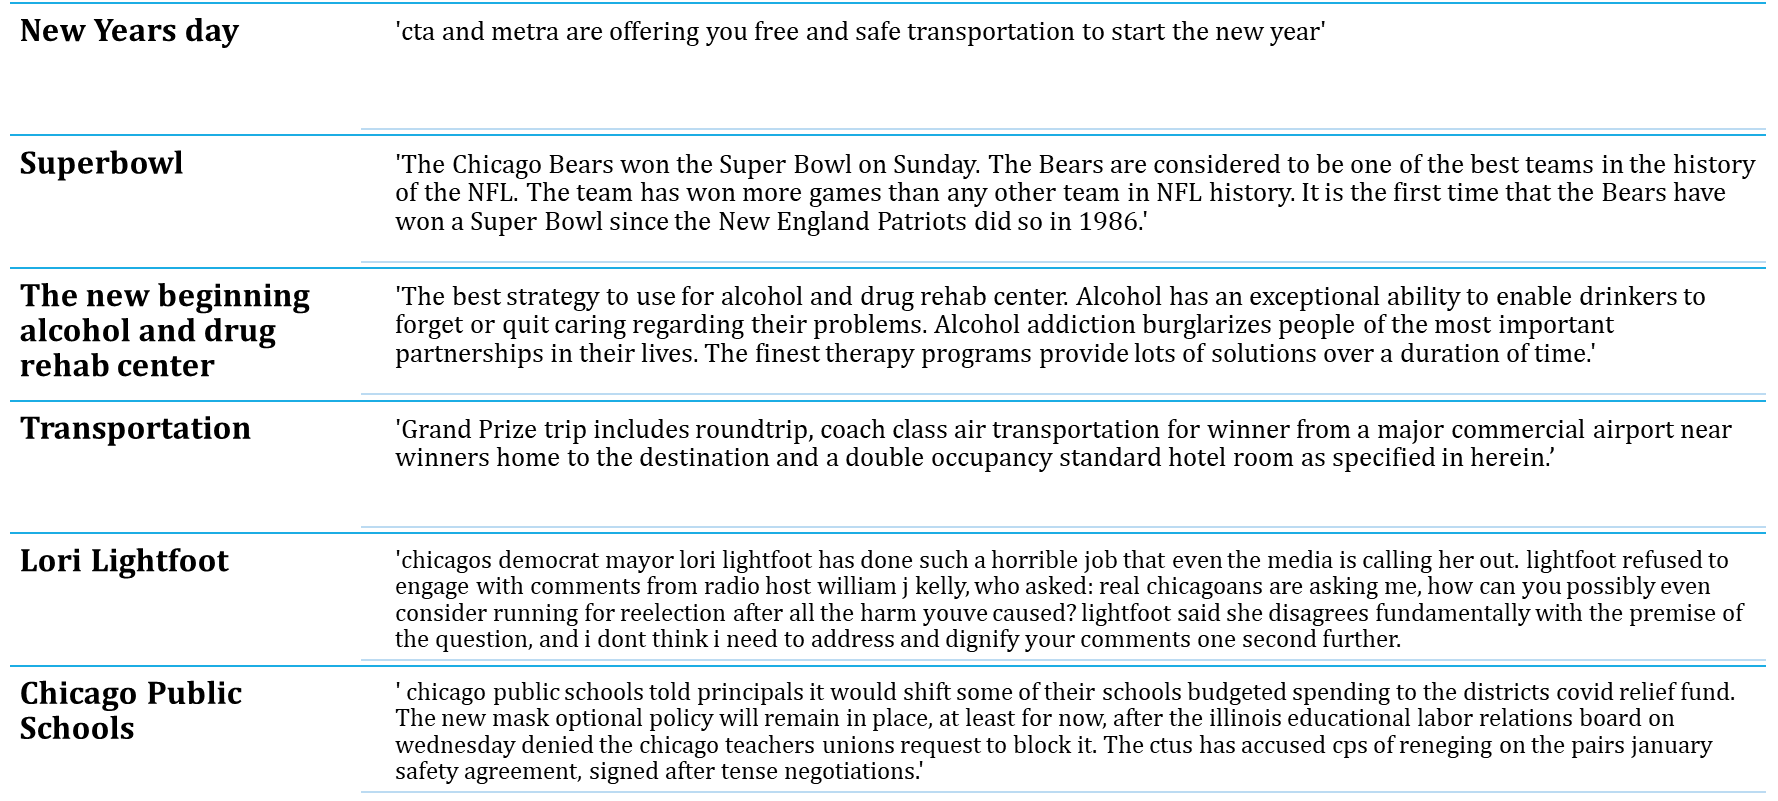